### <ins>Deep Neural Network for Handwritten Digit Recognition on MNIST Dataset</ins>

In the following project, **MNIST Dataset** has been used to classify handwritten digits into their respected values.
<img src="../images/three_layered_nn.png" width="50%" height="20%" alt="Three Layeerd Neural Network Architecture"/>

<ul>
    <li>No of iamges in Training Data = 6000</li>
    <li>No of iamges in Testing Data = 10000</li>
    <li>Each image is of size 28*28 pixels grayscale</li>
</ul>

<p> <b><ins>Neural Network Architecture</ins></b> </p>

<ul>
    <li>Three Layered Architecture</li>
    <li>Size of input layer = 28*28=784</li>
    <li>Size of hidden layer = 100</li>
    <li>Output layer of size 10 = No. of classes (10 digits)</li>
</ul>

In [1]:
# Import all the necessary libraries

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

<p><b><ins>Warning:</ins></b> Executing next cell will downlaod the dataset from the MNIST website (if you don't have it already in ~/.keras/datasets/ directory) which is of 11.5 MB</p>

<img src="../images/tf_keras_mnist.png" alt="MNIST Database sample image" width="70%" height="50%"/> 

In [2]:
# Download the dataset from MNIST website and load in the corrs. variables

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

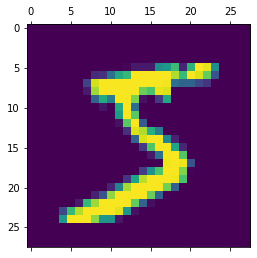

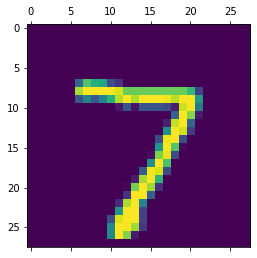

In [3]:
# Visualize first digit of train dataset and first digit of test dataset
plt.matshow(x_train[0])
plt.matshow(x_test[0])

In [4]:
#  Store necessary values

n = x_train[0].size                                              # Number of Features
m = len(x_train)                                                 # Number of Training Examples

#  Flatten the training and test datasets
x_train_flatten = x_train.reshape((m, n))
x_test_flatten = x_test.reshape((len(x_test),n))

# Scale the features
x_train_flatten = x_train_flatten/255
x_test_flatten = x_test_flatten/255

Two Neural Networks models have been developed to evaluate and compare performance on the dataset.

<ul>
    <li>Model 1 with two layers (no hidden layer) with <b>sigmoid</b> activation function.</li>
    <li>Model 2 with three layers (one hidden laye of size 100) with <b>relu (Rectified Linear Unit)</b> activation function.</li>
</ul>


In [5]:
# Define the Model

model1 = keras.Sequential([
    keras.layers.Dense(10, input_shape=(n,), activation="sigmoid")
])

model1.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [6]:
# Train the model on Training dataset

model1.fit(x_train_flatten, y_train, epochs=10)

# After training the model, an accuracy of approx. 93% on the training set is achieved

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7312 - accuracy: 0.8087
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3129 - accuracy: 0.9119
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2867 - accuracy: 0.9189
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2761 - accuracy: 0.9218
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2646 - accuracy: 0.9258
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2619 - accuracy: 0.9265
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2531 - accuracy: 0.9302
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2531 - accuracy: 0.9310
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2531 - accuracy: 0.9301
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.251

In [7]:
# Evaluate the performance of the model on test dataset

model1.evaluate(x_test_flatten, y_test)

# An accuracy of approx. 92% is achieved on the test dataset with cost of 0.2712

313/313 [==============================] - 1s 2ms/step - loss: 0.2654 - accuracy: 0.9262


[0.26542627811431885, 0.9261999726295471]

In [8]:
# Make predictions on the test dataset
# Store the prediction for each image in y_predictions

predictions1 = model1.predict(x_test_flatten)
y_predictions1 = predictions1.argmax(axis=1)

In [9]:
# See what actual values are predicted by our model
y_predictions1

array([7, 2, 1, ..., 4, 5, 6])

In [10]:
# Confusion Matrix

cm = tf.math.confusion_matrix(labels=y_test, predictions = y_predictions1)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    2,    2,    0,    7,    8,    2,    2,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   5,    9,  932,   15,    7,    3,   14,    8,   36,    3],
       [   2,    0,   19,  925,    1,   20,    3,    8,   26,    6],
       [   1,    1,    5,    2,  913,    0,   12,    5,   11,   32],
       [  10,    3,    3,   38,    7,  768,   16,    7,   33,    7],
       [  10,    3,    7,    1,    7,   10,  916,    1,    3,    0],
       [   1,    8,   29,    6,    7,    1,    0,  934,    4,   38],
       [   5,    9,    7,   19,    8,   18,   12,    7,  879,   10],
       [  10,    8,    1,    8,   27,    6,    0,   15,    9,  925]],
      dtype=int32)>

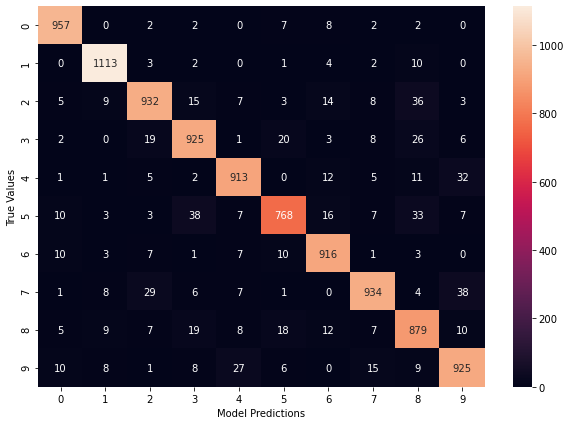

In [21]:
# Visualize Confusion Matrix using seaborn library

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Model Predictions")
plt.ylabel("True Values")

<p>Define another model with three layers and relu activation function</p>

<p>As will be seen, accuracy of the model will be imporved</p>

In [12]:
# Define the Model

model2 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(n,), activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])

model2.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [13]:
# Train the model on Training dataset

model2.fit(x_train_flatten, y_train, epochs=10)

# After training the model, an accuracy of approx. 99% (almost perfect) on the training set is achieved

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4513 - accuracy: 0.8723
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1344 - accuracy: 0.9609
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0901 - accuracy: 0.9725
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0673 - accuracy: 0.9804
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0521 - accuracy: 0.9846
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0407 - accuracy: 0.9875
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0324 - accuracy: 0.9903
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0265 - accuracy: 0.9918
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0216 - accuracy: 0.9937
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.018

In [14]:
# Evaluate the performance of the model on test dataset

model2.evaluate(x_test_flatten, y_test)

# An accuracy of approx. 97% is achieved on the test dataset with cost of 0.092

313/313 [==============================] - 1s 2ms/step - loss: 0.0918 - accuracy: 0.9763


[0.09183111041784286, 0.9763000011444092]

In [15]:
# Make predictions on the test dataset
# Store the prediction for each image in y_predictions

predictions2 = model2.predict(x_test_flatten)
y_predictions2 = predictions2.argmax(axis=1)

In [16]:
# Confusion Matrix

cm2 = tf.math.confusion_matrix(labels=y_test, predictions = y_predictions2)
cm2

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    0,    1,    0,    0,    1,    3,    1,    2,    0],
       [   0, 1125,    5,    0,    0,    0,    2,    0,    3,    0],
       [   3,    1, 1010,    4,    1,    0,    1,    5,    6,    1],
       [   0,    0,    2,  993,    0,    1,    1,    5,    3,    5],
       [   1,    2,    3,    2,  948,    2,    4,    1,    2,   17],
       [   1,    1,    0,   19,    1,  856,    2,    1,    7,    4],
       [   3,    4,    4,    1,    5,    4,  935,    0,    2,    0],
       [   0,    8,   10,    5,    0,    0,    0,  994,    2,    9],
       [   3,    2,    6,    9,    3,    4,    3,    2,  939,    3],
       [   0,    3,    0,    3,    5,    0,    1,    3,    3,  991]],
      dtype=int32)>

Text(69.0, 0.5, 'True Values')

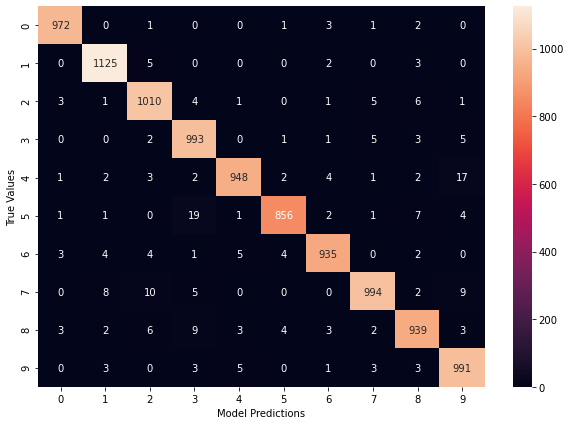

In [20]:
# Visualize Confusion Matrix using seaborn library

plt.figure(figsize=(10,7))
sn_plot = sn.heatmap(cm2, annot=True, fmt="d")
plt.xlabel("Model Predictions")
plt.ylabel("True Values")